 Import necessary libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

Load Dataset

In [152]:
df = pd.read_csv("C:/Users/mohdf/Downloads/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv")


Preprocess dataset

In [153]:
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [154]:
#  drop duplicates
df = df.drop_duplicates()

In [155]:
# handle missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [156]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [157]:
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.00000

In [158]:
# Convert True/False to 1/0 for 'Revenue' and 'Weekend'
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [159]:
# Encode categorical values
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [160]:
# Check Outliers
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_handle = [col for col in numerical_cols if col not in ['Revenue', 'Weekend']]

In [161]:
def find_outliers_quantile(series, lower_percentile=0.05, upper_percentile=0.95):
    """Identifies values outside the specified percentiles."""
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return (series < lower_bound) | (series > upper_bound)


In [162]:
print("\n--- Outlier Check (Quantile Method) ---")
for col in numerical_cols:
    outlier_mask = find_outliers_quantile(df[col])
    num_outliers = outlier_mask.sum()
    total_rows = len(df)
    percentage_outliers = (num_outliers / total_rows) * 100
    print(f"Column '{col}': {num_outliers} outliers ({percentage_outliers:.2f}%)")


--- Outlier Check (Quantile Method) ---
Column 'Administrative': 557 outliers (4.56%)
Column 'Administrative_Duration': 611 outliers (5.01%)
Column 'Informational': 482 outliers (3.95%)
Column 'Informational_Duration': 609 outliers (4.99%)
Column 'ProductRelated': 1148 outliers (9.41%)
Column 'ProductRelated_Duration': 611 outliers (5.01%)
Column 'BounceRates': 611 outliers (5.01%)
Column 'ExitRates': 1207 outliers (9.89%)
Column 'PageValues': 611 outliers (5.01%)
Column 'SpecialDay': 478 outliers (3.92%)
Column 'OperatingSystems': 585 outliers (4.79%)
Column 'Browser': 594 outliers (4.87%)
Column 'Region': 505 outliers (4.14%)
Column 'TrafficType': 274 outliers (2.24%)
Column 'Weekend': 0 outliers (0.00%)
Column 'Revenue': 0 outliers (0.00%)
Column 'Month_Dec': 0 outliers (0.00%)
Column 'Month_Feb': 181 outliers (1.48%)
Column 'Month_Jul': 432 outliers (3.54%)
Column 'Month_June': 285 outliers (2.34%)
Column 'Month_Mar': 0 outliers (0.00%)
Column 'Month_May': 0 outliers (0.00%)
Colum

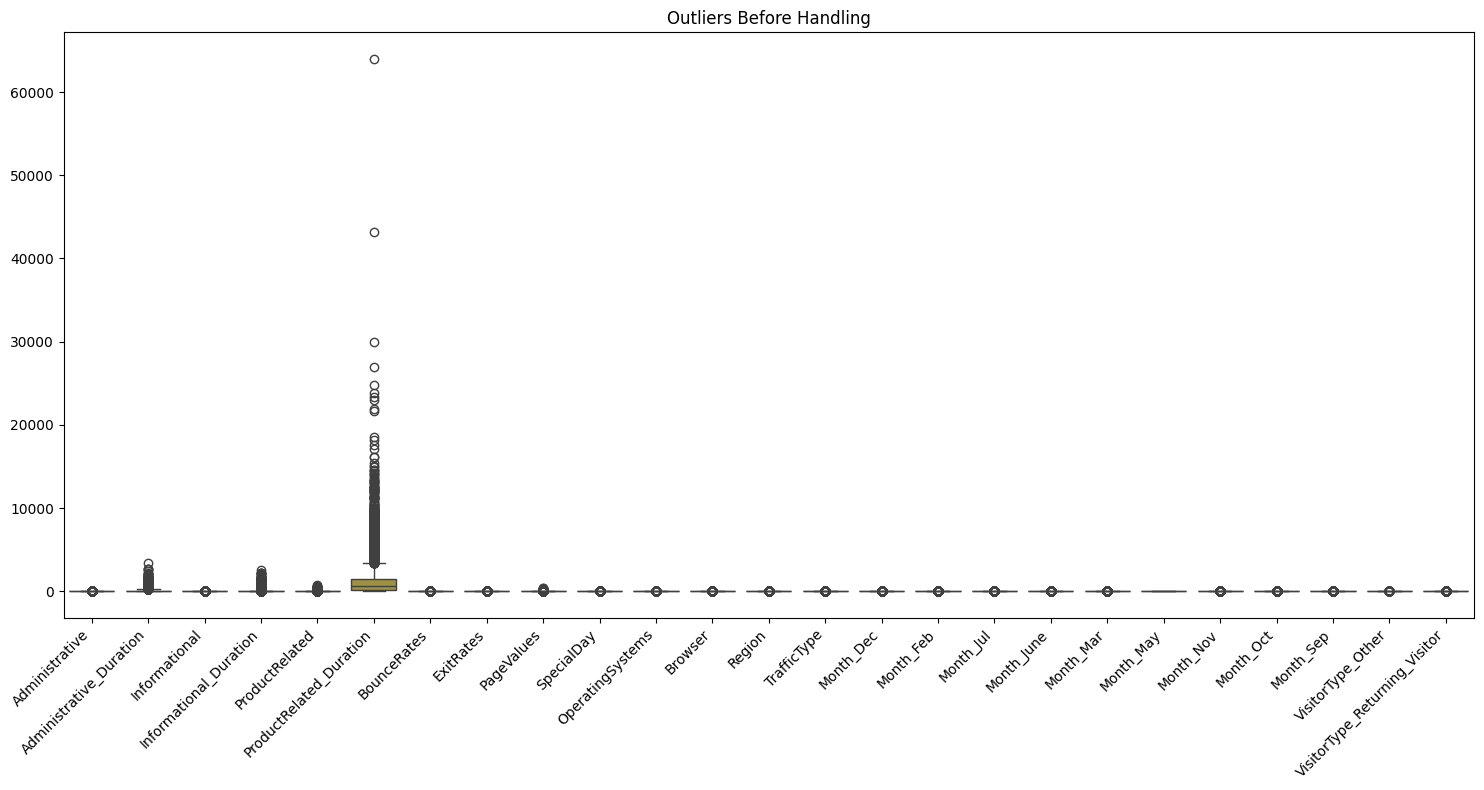

In [163]:
# Plotting Before Outlier Handling 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols_to_handle])
plt.title("Outliers Before Handling")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [164]:
#  Outlier Handling 
df_no_extreme_outliers = df.copy()
outlier_mask_extreme = pd.Series([False] * len(df))

In [165]:
for col in numerical_cols_to_handle:
    lower_quantile = df[col].quantile(0.05)
    upper_quantile = df[col].quantile(0.95)

    lower_outliers = df[col] < lower_quantile
    upper_outliers = df[col] > upper_quantile

    outlier_mask_extreme = outlier_mask_extreme | lower_outliers | upper_outliers


In [166]:
df_no_extreme_outliers = df[~outlier_mask_extreme]
print(f"Shape after removing extreme percentile-based outliers: {df_no_extreme_outliers.shape}")

Shape after removing extreme percentile-based outliers: (5962, 27)


C:\Users\mohdf\AppData\Local\Temp\ipykernel_28264\3668036295.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_extreme_outliers = df[~outlier_mask_extreme]


In [167]:
# --- Step 2: Remove remaining IQR-based outliers from the result of Step 1 ---
df_fully_cleaned = df_no_extreme_outliers.copy()
outlier_mask_iqr = pd.Series([False] * len(df_fully_cleaned))


In [168]:
def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

In [169]:
for col in numerical_cols_to_handle:
    outliers_iqr = identify_outliers_iqr(df_fully_cleaned[col])
    outlier_mask_iqr = outlier_mask_iqr | outliers_iqr

In [170]:
df_fully_cleaned = df_fully_cleaned[~outlier_mask_iqr]
print(f"Shape after removing remaining IQR-based outliers: {df_fully_cleaned.shape}")

Shape after removing remaining IQR-based outliers: (505, 27)


C:\Users\mohdf\AppData\Local\Temp\ipykernel_28264\3503720490.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fully_cleaned = df_fully_cleaned[~outlier_mask_iqr]


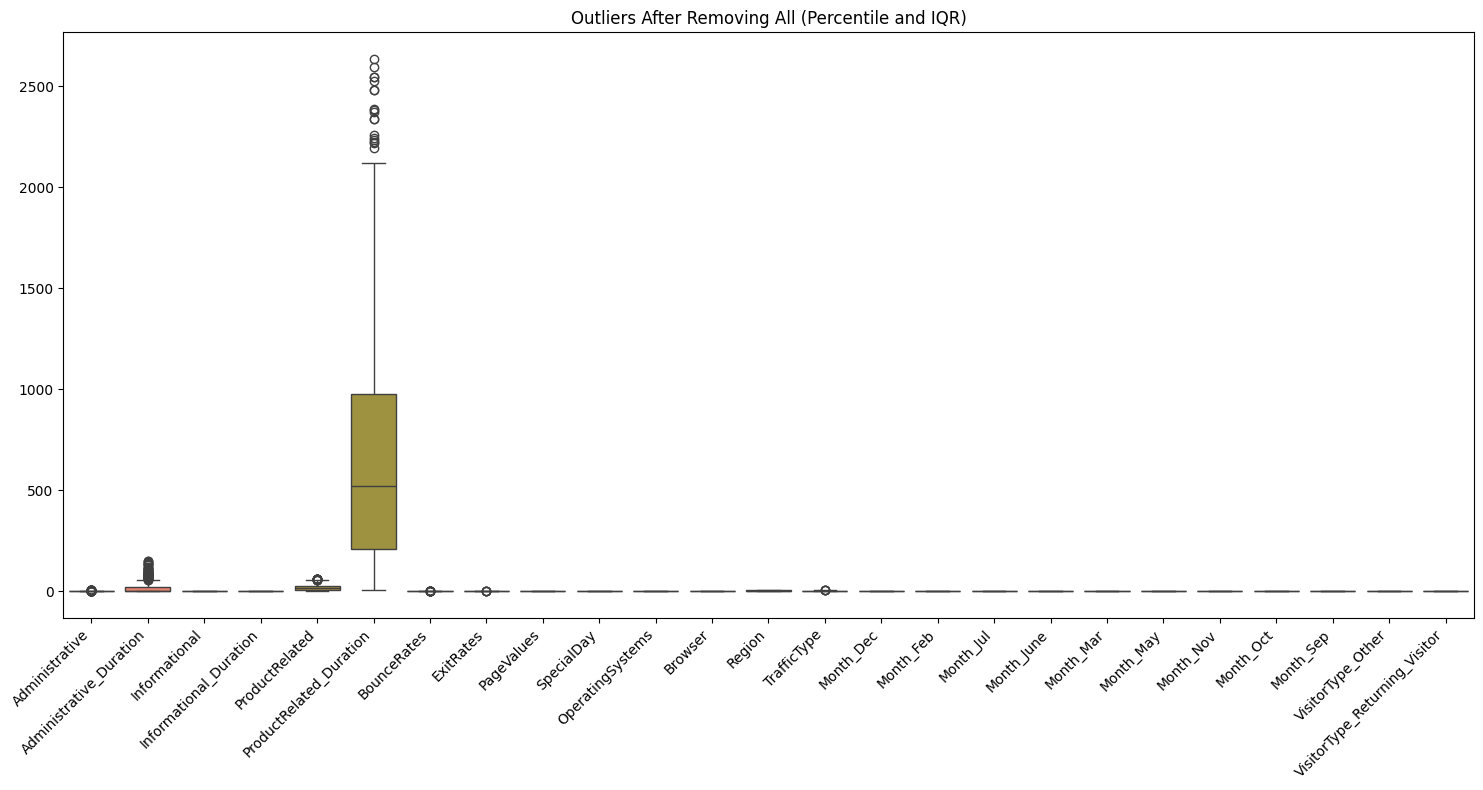

In [171]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_fully_cleaned[numerical_cols_to_handle])
plt.title("Outliers After Removing All (Percentile and IQR)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Split data

In [172]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [173]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Handling imbalanced data

In [174]:
# Apply SMOTE to training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Scaling data

In [175]:
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train_res)
X_test_scaled_lr = scaler.transform(X_test)

Model Building

In [176]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(kernel='rbf')
}

Model Training and Evaluation

In [177]:
# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy_scores[name] = acc
    f1_scores[name] = f1
    confusion_matrices[name] = cm
    
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print(f"{name} Confusion Matrix:\n", cm)

c:\Users\mohdf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3116
           1       0.57      0.71      0.63       546

    accuracy                           0.88      3662
   macro avg       0.76      0.81      0.78      3662
weighted avg       0.89      0.88      0.88      3662

Logistic Regression Confusion Matrix:
 [[2825  291]
 [ 157  389]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      3116
           1       0.35      0.65      0.46       546

    accuracy                           0.77      3662
   macro avg       0.64      0.72      0.66      3662
weighted avg       0.84      0.77      0.79      3662

KNN Confusion Matrix:
 [[2460  656]
 [ 189  357]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      3116
        

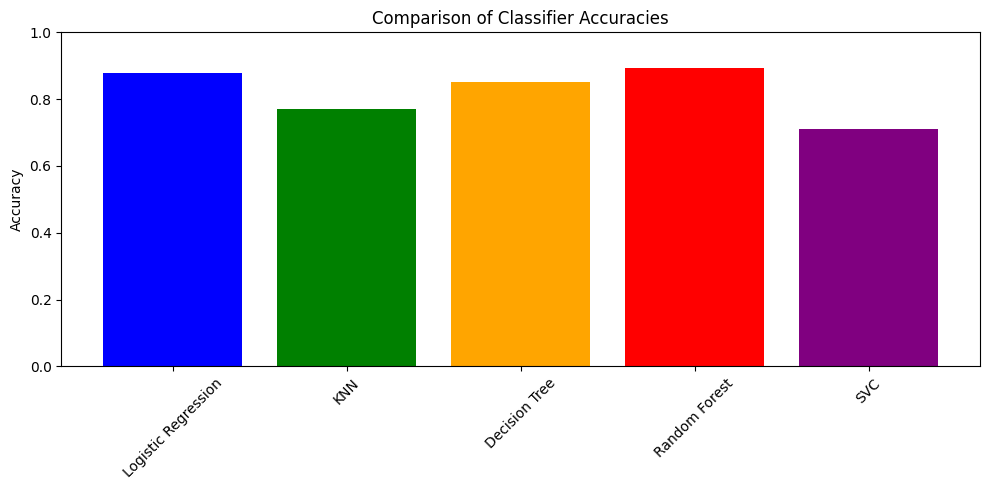

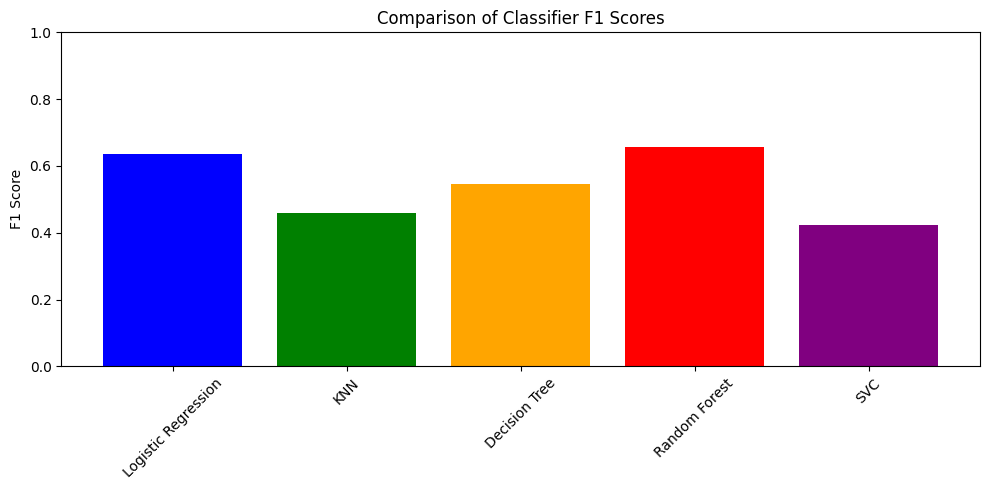

In [178]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Classifier Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(10,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Classifier F1 Scores")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

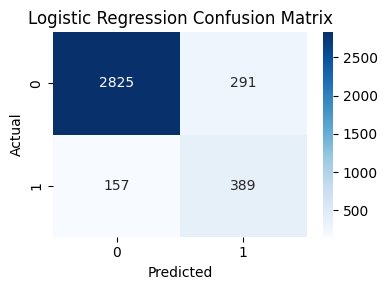

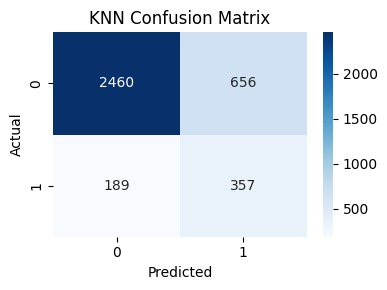

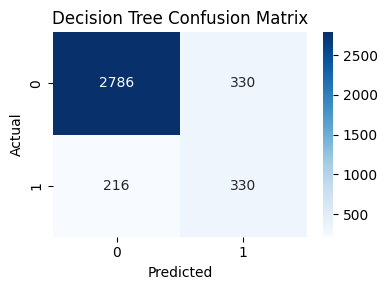

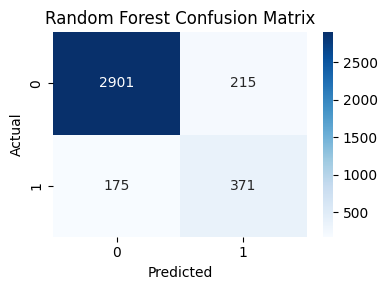

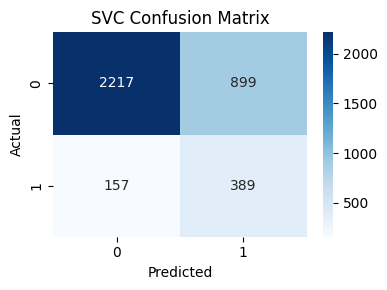

In [179]:
# Plot confusion matrices for each model
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

Based on the initial evaluation, the Random Forest algorithm demonstrated the highest overall accuracy and a good balance of precision and recall for the positive class
(shoppers who made a purchase). It generally outperformed other models in terms of correctly identifying both purchasers and non-purchasers, as indicated by the 
classification report and confusion matrix. While other models had their strengths,Random Forest's robust performance across multiple metrics makes it a strong candidate for this 
 task.

Random Forest Algorithm

In [180]:
random_forest_classifier = RandomForestClassifier(random_state=42)

In [181]:
# Train the Random Forest model
random_forest_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [182]:
# Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(X_test)

In [183]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=1)
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [184]:
print("\n--- Random Forest Performance (Separate Implementation) ---")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print("Random Forest Classification Report:\n", report_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)


--- Random Forest Performance (Separate Implementation) ---
Random Forest Accuracy: 0.8973
Random Forest F1-Score: 0.6673
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.65      0.69      0.67       546

    accuracy                           0.90      3662
   macro avg       0.80      0.81      0.80      3662
weighted avg       0.90      0.90      0.90      3662

Random Forest Confusion Matrix:
 [[2909  207]
 [ 169  377]]
